<a href="https://colab.research.google.com/github/merlynjocol/DigitalActions_NLP_NLU/blob/main/NLP_Heidi_Exploratory_Data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 🔷 Exploratory Text Analysis 

# 🔷 Definig the NLP tools to use in the Data Exploration

In this process I will be used SpaCy library. It's a library mosty used in the industry, more than NLTK. However can be use in combination of other libraries, depending on the task you want to solve. 
Advantages of SpaCy: 

NLTK was built by scholars and researchers as a tool who want to build something from the ground up or provide a functioning model of their thesis. In contrast, spaCy is similar to a service: it helps you get specific tasks done.

SpaCy, on the other hand, is the way to go for app developers. While NLTK provides access to many algorithms to get something done, spaCy provides the best way to do it. It provides the fastest and most accurate syntactic analysis of any NLP library released to date. It also offers access to larger word vectors that are easier to customize. For an app builder mindset that prioritizes getting features done, spaCy would be the better choice.

spaCy’s performance is better, is atributed to the fact that it was written in Cython from the ground up.


Documentation and Tutorial Spacy
- https://spacy.io/usage/spacy-101

Simmilarities docs
- https://spacy.io/universe/project/spacy-sentence-bert

# 🔷 Importing Libraries

In [ ]:
!pip install pandas

In [ ]:
import pandas as pd
pd.__version__

'1.1.5'

In [ ]:
import pandas as pd
from pandas import DataFrame

import spacy

# to avoid the visualization of warnings
import warnings
warnings.filterwarnings("ignore",category=DeprecationWarning)

In [ ]:
# load spacy with large English model
# nlp = spacy.load("en-core-web-lg") -- was working on Windows, but now on a Mac
nlp = spacy.load("en_core_web_sm")

the second line above is a download for language resources (models, etc.) and the _sm at the end of the download's name indicates a "small" model. There's also "medium" and "large", albeit those are quite large. Some of the more advanced features depend on the latter (https://spacy.io/models/en)

Now let's load spaCy and run some code:

## Importing Files from GitHub

In [ ]:
# import files from Google Drive
from google.colab import drive
drive.mount('/gdrive', force_remount=True)

Mounted at /gdrive


In [ ]:
# download data from github docs_csguide.csv
url ="https://github.com/merlynjocol/DigitalActions_NLP_NLU/blob/main/Datasets/docs_csguide.csv?raw=true"

In [ ]:
docs_csguide = pd.read_csv(url)

In [ ]:
docs_csguide

NameError: ignored

In [ ]:
docs_csguide.head(2)

,Unnamed: 0,linkDrive,text,URLs,count_URLs,clean_meaning,pre_cleantext,cleanText
0,0,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,A Framework for Articulating and Measuring Ind...,"['https://doi.org/10.5334/cstp.126', 'https://...",19,A Framework for Articulating and Measuring Ind...,a framework for articulating and measuring ind...,framework articulating measuring individual le...
1,1,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,What do volunteers want from citizen science t...,"['https://doi.org/10.22323/2.18010202DOI', 'ht...",44,What do volunteers want from citizen science t...,what do volunteers want from citizen science t...,volunteers want citizen science technologies s...


In [ ]:
docs_csguide.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22 entries, 0 to 21
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   Unnamed: 0     22 non-null     int64 
 1   linkDrive      22 non-null     object
 2   text           22 non-null     object
 3   URLs           22 non-null     object
 4   count_URLs     22 non-null     int64 
 5   clean_meaning  22 non-null     object
 6   pre_cleantext  22 non-null     object
 7   cleanText      22 non-null     object
dtypes: int64(2), object(6)
memory usage: 1.5+ KB


## Variables 

- *linkDrive:* the filelink in Google Drive Folder
- *text:* is the text after extract from the reports and articles
- *URL's*: Contain all the URL's in each document
- *clean_meaning*: contain the text after process specific words to avoidn loose the meaning after the cleaning. eg co-design. Also this text doesn't contain URL and emails. Contain puntuation, Uppercase and numbers
- *pre_cleantext*: is a specific cleaning of characters and words. Not contain puntuation and numbers. All text is in lowercase
- cleanText: Text all clean preapre for Topic Modelling

# 🔷 Process all directory files with spacy






### Creating the container (NLP)

First we created a doc from the text, which is a container for a document and all of its annotations. Then we iterated through the document to see what spaCy had parsed.

---



*Let*'s run each document through the natural language parser (nlp variable)!:



In [ ]:
# helper function to process documents in an apply function and return the nlp object
def processDoc(doc):
    return nlp(doc)




The column "NLP" is a container for each document and all of its annotations. It need to be done before to process the text

In [ ]:
%%time
docs_csguide['NLP']=docs_csguide['cleanText'].apply(processDoc)

CPU times: user 24.1 s, sys: 914 ms, total: 25 s
Wall time: 25 s


In [ ]:
# Creating the colums with singles words
docs_csguide['text_word_count'] = docs_csguide['text'].apply(lambda x: len(x.strip().split()))  # word count
docs_csguide['text_unique_words']=docs_csguide['text'].apply(lambda x:len(set(str(x).split())))  # number of unique words
docs_csguide['clean_word_count'] = docs_csguide['cleanText'].apply(lambda x: len(x.strip().split()))  # word count
docs_csguide['clean_unique_words']=docs_csguide['cleanText'].apply(lambda x:len(set(str(x).split())))  # number of unique words


## Total of words in the analysis

In [ ]:
totalWords = docs_csguide['text_word_count'].sum()
uniqueWords = docs_csguide['text_unique_words'].sum()
print ("Total Words:", totalWords)
print ("Total Unique Words:", uniqueWords )

Total Words: 278920
Total Unique Words: 65336


In [ ]:
docs_csguide.describe()

,Unnamed: 0,count_URLs,text_word_count,text_unique_words,clean_word_count,clean_unique_words
count,22.000000,22.000000,22.000000,22.000000,22.000000,22.000000
mean,5.727273,64.727273,12678.181818,2969.818182,7280.000000,1734.954545
std,4.278204,73.689297,13375.727201,1690.665539,7120.135639,811.260306
min,0.000000,1.000000,2746.000000,979.000000,1377.000000,591.000000
25%,2.250000,11.000000,5566.750000,1874.250000,3688.250000,1163.250000
50%,5.000000,33.000000,9397.000000,2533.000000,5527.000000,1534.000000
75%,8.750000,100.000000,11072.750000,3300.750000,6826.000000,2008.000000
max,14.000000,251.000000,61886.000000,7750.000000,32871.000000,3849.000000



## List of Stopwords in SpaCy


In [ ]:
# Stop words from SpaCy
#importing stop words from English language.
import spacy
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))

#Printing first ten stop words:
print('First ten stop words: %s' % list(spacy_stopwords)[:20])

Number of stop words: 326
First ten stop words: ['never', 'too', 'own', 'beside', 'nobody', 'quite', 'whereas', 'both', 'but', 'what', 'been', 'becoming', 'wherein', 'indeed', 'may', 'over', 'anyhow', 'with', 'fifteen', 'into']


## Exploration of most common words and nouns

In [ ]:
# let us look most used words for each part of speech
from collections import defaultdict, Counter

posCounts = defaultdict(Counter)

for doc in docs_csguide.NLP:
    for token in doc:
        posCounts[token.pos][token.orth] += 1

for pos_id, counts in sorted(posCounts.items()):
    pos = doc.vocab.strings[pos_id]
    for orth_id, count in counts.most_common(1):
        print(pos, count, doc.vocab.strings[orth_id])

ADJ 593 scientific
ADP 226 within
ADV 880 also
AUX 37 get
CCONJ 66 either
DET 103 another
INTJ 55 well
NOUN 3082 science
NUM 478 one
PART 32 not
PRON 95 something
PROPN 959 et
PUNCT 13 co
SCONJ 186 whether
SYM 49 x
VERB 886 may
X 94 etc


## Total of List of stopwords + customwords

Notice that after checking the most common words, there are words that are not useful for the analysis. e.g. "et", "etc". We need to add them to the list of stopwords give from SpaCy

In [ ]:
# add some common words to stop wordds that may not add much context
# I used the list in english
from spacy.lang.en.stop_words import STOP_WORDS
customStopWords = [
    'whether', 'x', 'may','either','also', 'project', 'science','citizen', 'example', 'etc', 'et', 'al' ,'org', 'co', "mailto", "pp", "p", "doi", "www", "nov", "feb", "ph"]

for w in customStopWords:
    if w not in STOP_WORDS:
        STOP_WORDS.add(w)

In [ ]:
spacy_stopwords = spacy.lang.en.stop_words.STOP_WORDS

#Printing the total number of stop words:
print('Number of stop words: %d' % len(spacy_stopwords))
print('Number of stop words: %d' % len(STOP_WORDS))

Number of stop words: 344
Number of stop words: 344


# 🔷 Explore  The Most Frequent Words, Nouns, Organizations, Entities 

### Words

In [ ]:
# get most common nouns
from collections import defaultdict, Counter
from spacy.symbols import nsubj, VERB, dobj, NOUN, root, xcomp, PROPN, NUM,SYM

# all tokens that arent stop words or punctuations
words=[]
for doc in docs_csguide.NLP:
    words += [token.lemma_ for token in doc if token.pos==NOUN and (not token.lemma_ in STOP_WORDS)] 


# 20 most common tokens
wordFreq = Counter(words)
commonWords = wordFreq.most_common(20)

#### Visuals using seaborn

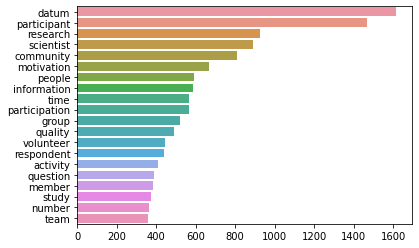

In [ ]:
import seaborn as sns

x, y= [], []
for word,count in commonWords[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

#### Visuals in plotly 
- https://medium.com/analytics-vidhya/an-intro-to-customizing-charts-in-plotly-express-e3c473740f66
- https://plotly.com/python/builtin-colorscales/
- Viridis and Viridis_r (to reverse the color)

In [ ]:
import plotly.express as px
import plotly.graph_objects as go

In [ ]:
# create DataFrame using data
df = pd.DataFrame(commonWords , columns =['word', 'count'])

fig = px.bar(df, x='count', y="word", orientation='h', template='plotly_white', title = 'The 20 Most Frequent Words',
             height=500, width = 500 , color = "count", color_continuous_scale = "Viridis" ,
            )
fig.update_xaxes(title_text='Words count')
fig.update_yaxes(title_text='Word')
fig.update_layout(yaxis={'categoryorder':'total ascending'})
fig.show()

# marker={'color': x, colorscale: 'Viridis'}

In [ ]:
# get most common proper nouns
from collections import defaultdict, Counter
from spacy.symbols import nsubj, VERB, dobj, NOUN, root, xcomp, PROPN, NUM,SYM
# all tokens that arent stop words or punctuations
words=[]
for doc in docs_csguide.NLP:
    
    words += [token.lemma_ for token in doc if token.pos==PROPN and (not token.lemma_ in STOP_WORDS)\
             and (len(token)>1)] 


# five most common tokens
wordFreq = Counter(words)
commonWords = wordFreq.most_common(40)
print(commonWords)

[('data', 215), ('research', 186), ('epa', 121), ('university', 107), ('quality', 107), ('tekstveld', 99), ('community', 84), ('geoghegan', 81), ('uk', 76), ('bscs', 72), ('zurich', 69), ('bonney', 66), ('national', 61), ('framework', 60), ('agency', 59), ('association', 56), ('cs', 56), ('online', 54), ('assurance', 53), ('outcomes', 52), ('engagement', 50), ('european', 47), ('protection', 47), ('social', 46), ('handbook', 46), ('education', 45), ('center', 44), ('zooniverse', 44), ('de', 43), ('citsci', 42), ('state', 41), ('development', 40), ('journal', 40), ('rq', 40), ('raddick', 39), ('environmental', 38), ('designing', 38), ('protocol', 38), ('analysis', 38), ('zoo', 37)]


### Nouns

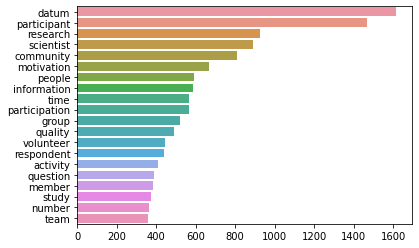

In [ ]:
# plot most common nouns
x, y= [], []
for word,count in commonWords[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

### Organization Entities

In [ ]:
# most frequest ORG entities
entities=[]
for doc in docs_csguide.NLP:
    # all entities
    for ent in doc.ents:
        #print(ent.text)
        if ent.label_ == 'ORG':
            if ent.text not in STOP_WORDS:
                entities += [ent.text]
entityFreq = Counter(entities)
commonEntities = entityFreq.most_common(40)
print(commonEntities)

[('epa', 59), ('eu', 20), ('appendix', 13), ('pande group', 10), ('analyse data', 8), ('digital', 8), ('epa qa handbook', 8), ('u envtl protection agency', 7), ('colorado state university', 6), ('nos', 5), ('european union', 5), ('app', 5), ('faa', 5), ('fhpt', 5), ('journal', 4), ('social sciences', 4), ('european citizen science association', 4), ('nasa', 4), ('fed', 4), ('nat l freedom information coalition', 4), ('ag', 4), ('ukeof', 4), ('scientist university', 4), ('national science foundation', 3), ('uk university', 3), ('london ucl press', 3), ('usa', 3), ('microsoft', 3), ('ec', 3), ('cwa', 3), ('kepler', 3), ('al national research council', 2), ('national research council', 2), ('u canada', 2), ('recruit', 2), ('google', 2), ('globe', 2), ('learners journal community', 2), ('gulf maine research institute', 2), ('science alliance', 2)]


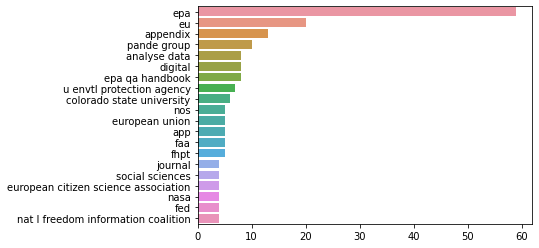

In [ ]:
x, y= [], []
for word,count in commonEntities[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

### Person Entities

In [ ]:
# most frequest PERSON entities
entities=[]
for doc in docs_csguide.NLP:
    # all entities
    for ent in doc.ents:
        #print(ent.text)
        if ent.label_ == 'PERSON':
            if ent.text not in STOP_WORDS:
                entities += [ent.text]
entityFreq = Counter(entities)
commonEntities = entityFreq.most_common(40)
print(commonEntities)

[('zurich handbook', 23), ('epa qa handbook', 10), ('ryan', 9), ('et al', 7), ('roy et al', 7), ('zooniverse', 6), ('kim mankoff', 5), ('raddick et al', 5), ('phillips et al framework', 4), ('rick bonney', 4), ('crowston', 4), ('al kim', 4), ('lynn et al designing platform', 4), ('supra', 4), ('tina phillips', 3), ('lee', 3), ('gonzalez moll', 3), ('hoadley kilner', 3), ('kb', 3), ('zhang et al', 3), ('edwards mcdonnell simpson', 3), ('citsci org', 3), ('qc', 3), ('qc samples', 3), ('malariacontrol', 3), ('framework preece', 3), ('crall et al', 2), ('mugar et al', 2), ('kollmuss agyeman', 2), ('jennifer', 2), ('crowston wang', 2), ('bowser hansen preece et al', 2), ('idris et al', 2), ('tang greenberg', 2), ('phillips', 2), ('scardamalia', 2), ('ruth kermish allen', 2), ('sarah', 2), ('jennett', 2), ('greg newman', 2)]


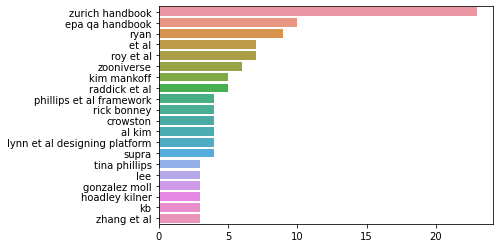

In [ ]:
x, y= [], []
for word,count in commonEntities[:20]:
        x.append(word)
        y.append(count)
        
sns.barplot(x=y,y=x)

# 🔷 Running Experiments

## ▶ Tokenization - Lemmatization. Working with Pipelines
- Time comparison of task completion 
- Approach: Working with each document in the data frame

Check fundamentals of Tokenizer

https://machinelearningknowledge.ai/complete-guide-to-spacy-tokenizer-with-examples/


## Option 1: Sequentially process DataFrame

Process this text is to use an existing method, in this case the lemmatize method shown below, and apply it to the clean column of the DataFrame using pandas.Series.apply. Lemmatization is done using the spaCy's underlying Doc representation of each token, which contains a lemma_ property. Stopwords are removed simultaneously with the lemmatization process, as each of these steps involves iterating through the same list of tokens.

In [ ]:
def lemmatize(doc):
    """Perform lemmatization and stopword removal in the clean text
       Returns a list of lemmas
    """
    doc = nlp(doc)
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in spacy_stopwords]
    return lemma_list

   

The resulting lemmas are stored as a list in a separate column "lemma" as shown below.

In [ ]:
# Hide warnings 
import warnings 
warnings.filterwarnings("ignore", category=DeprecationWarning)

In [ ]:
%%time
docs_csguide['lemma'] = docs_csguide['cleanText'].apply(lemmatize)
docs_csguide.head(3)

CPU times: user 20.2 s, sys: 571 ms, total: 20.8 s
Wall time: 20.7 s


In [ ]:
docs_csguide.head(3)

,Unnamed: 0,linkDrive,text,URLs,count_URLs,clean_meaning,pre_cleantext,cleanText,lemma_pipe,lemma
0,0,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,A Framework for Articulating and Measuring Ind...,"['https://doi.org/10.5334/cstp.126', 'https://...",19,A Framework for Articulating and Measuring Ind...,a framework for articulating and measuring ind...,framework articulating measuring individual le...,"[framework, articulate, measure, individual, l...","[framework, articulate, measure, individual, l..."
1,1,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,What do volunteers want from citizen science t...,"['https://doi.org/10.22323/2.18010202DOI', 'ht...",44,What do volunteers want from citizen science t...,what do volunteers want from citizen science t...,volunteers want citizen science technologies s...,"[volunteer, want, technologie, systematic, lit...","[volunteer, want, technologie, systematic, lit..."
2,2,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,1424-8071-2-CE The Journal of Community Inform...,['http://www.ci-journal.net/index.php/ciej/art...,2,1424-8071-2-CE The Journal of Community Inform...,ce the journal of community informatics iss...,ce journal community informatics issn articles...,"[ce, journal, community, informatics, issn, ar...","[ce, journal, community, informatics, issn, ar..."


## Option 2: Use nlp.pipe

in the spaCy documentation, it is stated that "processing texts as a stream is usually more efficient than processing them one-by-one". This is done by calling a language pipe, which internally divides the data into batches to reduce the number of pure-Python function calls. This means that the larger the data, the better the performance gain that can be obtained by nlp.pipe.

To use the language pipe to stream texts, a new lemmatizer method is defined that directly works on a spaCy Doc object. This method is then called in batches to work on a sequence of Doc objects that are streamed through the pipe as shown below.

In [ ]:
def lemmatize_pipe(doc):
    lemma_list = [str(tok.lemma_).lower() for tok in doc
                  if tok.is_alpha and tok.text.lower() not in spacy_stopwords] 
    return lemma_list

def preprocess_pipe(texts):
    preproc_pipe = []
    for doc in nlp.pipe(texts, batch_size=20):
        preproc_pipe.append(lemmatize_pipe(doc))
    return preproc_pipe

In [ ]:
%%time
docs_csguide['lemma_pipe'] = preprocess_pipe(docs_csguide['cleanText'])
docs_csguide.head(3)

CPU times: user 16.3 s, sys: 1.09 s, total: 17.4 s
Wall time: 17.3 s


In [ ]:
docs_csguide.head(2)

,Unnamed: 0,linkDrive,text,URLs,count_URLs,clean_meaning,pre_cleantext,cleanText,lemma_pipe
0,0,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,A Framework for Articulating and Measuring Ind...,"['https://doi.org/10.5334/cstp.126', 'https://...",19,A Framework for Articulating and Measuring Ind...,a framework for articulating and measuring ind...,framework articulating measuring individual le...,"[framework, articulate, measure, individual, l..."
1,1,/gdrive/MyDrive/Colab Notebooks/HEIDI_docs_rep...,What do volunteers want from citizen science t...,"['https://doi.org/10.22323/2.18010202DOI', 'ht...",44,What do volunteers want from citizen science t...,what do volunteers want from citizen science t...,volunteers want citizen science technologies s...,"[volunteer, want, technologie, systematic, lit..."


In [ ]:
docs_csguide['lemma_pipe']

0     [framework, articulate, measure, individual, l...
1     [volunteer, want, technologie, systematic, lit...
2     [ce, journal, community, informatics, issn, ar...
3     [design, principle, online, learning, communit...
4     [learn, develop, capital, richard, edwards, sa...
5     [design, platform, ethical, case, study, citsc...
6     [forum, bioscience, june, vol, bioscience, aut...
7     [handbook, quality, assurance, documentation, ...
8     [skille, library, staff, researcher, public, s...
9     [bscs, bscs, learn, designing, education, work...
10    [work, improve, data, quality, guide, governme...
11    [guide, ask, good, approach, answer, research,...
12    [initiating, choose, partner, method, particip...
13    [introduction, define, grassroots, initiative,...
14    [researcher, contrast, professional, researche...
15    [production, booklet, researcher, mean, coprod...
16    [era, net, promote, european, research, biodiv...
17    [uzh, publikation, practice, zurich, handb

## Option 3. List of Token lemmatized 

In [ ]:
fullText= docs_csguide['lemma_pipe'].tolist()
